In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

## Import data

In [2]:
titanic_train = pd.read_csv("train.csv")

In [3]:
titanic_test = pd.read_csv("test.csv")

## Explore data

In [4]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
corr = titanic_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1,-0.00500666,-0.035144,0.0368472,-0.0575268,-0.00165201,0.0126582
Survived,-0.00500666,1,-0.338481,-0.0772211,-0.0353225,0.0816294,0.257307
Pclass,-0.035144,-0.338481,1,-0.369226,0.0830814,0.0184427,-0.5495
Age,0.0368472,-0.0772211,-0.369226,1,-0.308247,-0.189119,0.0960667
SibSp,-0.0575268,-0.0353225,0.0830814,-0.308247,1,0.414838,0.159651
Parch,-0.00165201,0.0816294,0.0184427,-0.189119,0.414838,1,0.216225
Fare,0.0126582,0.257307,-0.5495,0.0960667,0.159651,0.216225,1


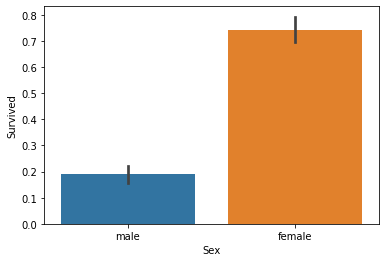

In [7]:
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_train )

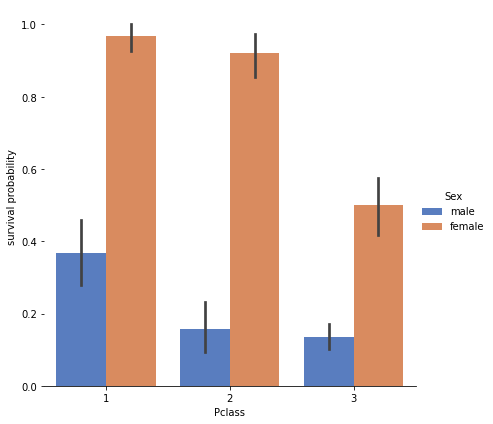

In [8]:
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=titanic_train,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

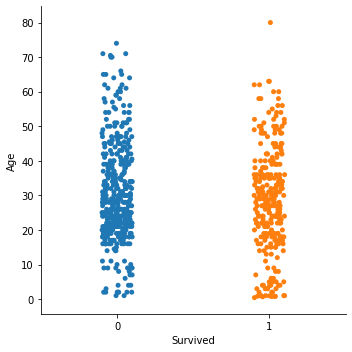

In [9]:
sns.catplot(x="Survived", y="Age", data=titanic_train)

## Prepare data

In [10]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
titanic_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
passengerId = titanic_test.PassengerId

In [13]:
titanic_train = titanic_train.fillna({"Age": titanic_train.Age.median()})

In [14]:
titanic_train = titanic_train.fillna({"Fare": titanic_train.Fare.median()})

In [15]:
titanic_test = titanic_test.fillna({"Fare": titanic_test.Fare.median()})

In [16]:
titanic_test = titanic_test.fillna({"Age": titanic_test.Age.median()})

In [17]:
X_train = titanic_train.drop(["Cabin", "PassengerId", "Embarked"] , axis = 1)

In [18]:
X_test = titanic_test.drop(["Cabin", "PassengerId", "Embarked"] , axis = 1)

In [19]:
y_train =  titanic_train["Survived"]

In [20]:
X_train.Sex = pd.factorize(X_train["Sex"])[0]

In [21]:
X_test.Sex = pd.factorize(X_test["Sex"])[0]

In [22]:
X_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000


In [23]:
X_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000
2,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875
3,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875
...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",0,27.0,0,0,A.5. 3236,8.0500
414,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000
415,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500
416,3,"Ware, Mr. Frederick",0,27.0,0,0,359309,8.0500


## Feature Engineering

In [24]:
X_train["Relatives_sum"] = X_train["SibSp"] + X_train["Parch"]

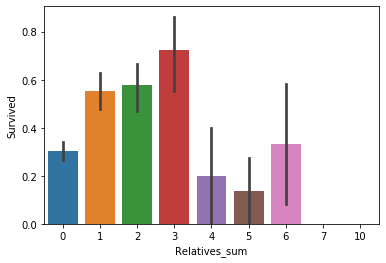

In [25]:
sns.barplot(x = 'Relatives_sum', y = 'Survived', data = X_train )

In [26]:
X_test["Relatives_sum"] = X_test["SibSp"] + X_test["Parch"]

In [27]:
X_train["Relatives"] = np.where(X_train["Relatives_sum"] > 0, 1, 0)

In [28]:
X_test["Relatives"] = np.where(X_test["Relatives_sum"] > 0, 1, 0)

In [29]:
X_train["Minor"] =  np.where(X_train["Age"] < 16, 1, 0)

In [30]:
X_test["Minor"] =  np.where(X_test["Age"] < 16, 1, 0)

In [31]:
X_train["Name_len"] = X_train.Name.str.split(',', expand = True)[0].str.len()

In [32]:
X_test["Name_len"] = X_test.Name.str.split(',', expand = True)[0].str.len()

In [33]:
X_train = X_train.drop(["SibSp", "Parch", "Relatives_sum", "Survived", "Name", "Ticket"] , axis = 1)

In [34]:
X_test = X_test.drop(["SibSp", "Parch", "Relatives_sum", "Ticket", "Name"] , axis = 1)

In [35]:
X_train

,Pclass,Sex,Age,Fare,Relatives,Minor,Name_len
0,3,0,22.0,7.2500,1,0,6
1,1,1,38.0,71.2833,1,0,7
2,3,1,26.0,7.9250,0,0,9
3,1,1,35.0,53.1000,1,0,8
4,3,0,35.0,8.0500,0,0,5
...,...,...,...,...,...,...,...
886,2,0,27.0,13.0000,0,0,8
887,1,1,19.0,30.0000,0,0,6
888,3,1,28.0,23.4500,1,0,8
889,1,0,26.0,30.0000,0,0,4


In [36]:
X_test

,Pclass,Sex,Age,Fare,Relatives,Minor,Name_len
0,3,0,34.5,7.8292,0,0,5
1,3,1,47.0,7.0000,1,0,6
2,2,0,62.0,9.6875,0,0,5
3,3,0,27.0,8.6625,0,0,4
4,3,1,22.0,12.2875,1,0,8
...,...,...,...,...,...,...,...
413,3,0,27.0,8.0500,0,0,7
414,1,1,39.0,108.9000,0,0,13
415,3,0,38.5,7.2500,0,0,7
416,3,0,27.0,8.0500,0,0,4


In [37]:
X_train.isnull().sum()

Pclass       0
Sex          0
Age          0
Fare         0
Relatives    0
Minor        0
Name_len     0
dtype: int64

In [38]:
X_train.isnull().sum()

Pclass       0
Sex          0
Age          0
Fare         0
Relatives    0
Minor        0
Name_len     0
dtype: int64

## Prediction

In [39]:
clf = RandomForestClassifier()

In [40]:
params = {"n_estimators": range(50,100,5), "max_depth":(5,30,2), "min_samples_leaf":(2,10,2), "min_samples_split":(2,10,2)}

In [41]:
g_clf = GridSearchCV(clf, params, cv = 5)

In [42]:
g_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [43]:
g_clf.best_params_

{'max_depth': 30,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 70}

In [44]:
g_clf.best_score_

0.8249158249158249

In [45]:
pred = g_clf.predict(X_test)

## Export data for Kaggle

In [46]:
kaggle = pd.DataFrame({'PassengerId': passengerId, 'Survived': pred})

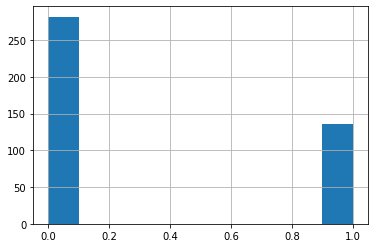

In [47]:
kaggle["Survived"].hist()

In [48]:
kaggle.to_csv('titanic_pred.csv', index = False)